In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Linear Regression

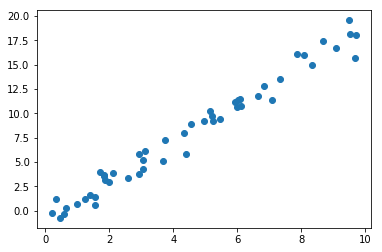

In [2]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = (2 * x) - 1 + rng.randn(50)
plt.scatter(x, y)

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
print(model)
X = x[:, np.newaxis]
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[1.9776566]
-0.9033107255311164


/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


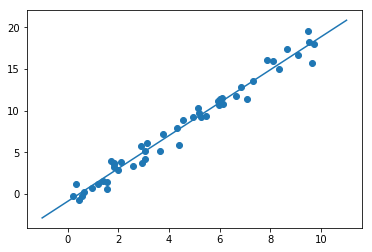

In [4]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Gaussian Naive Bayes

In [5]:
iris = sns.load_dataset('iris')
iris.describe()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


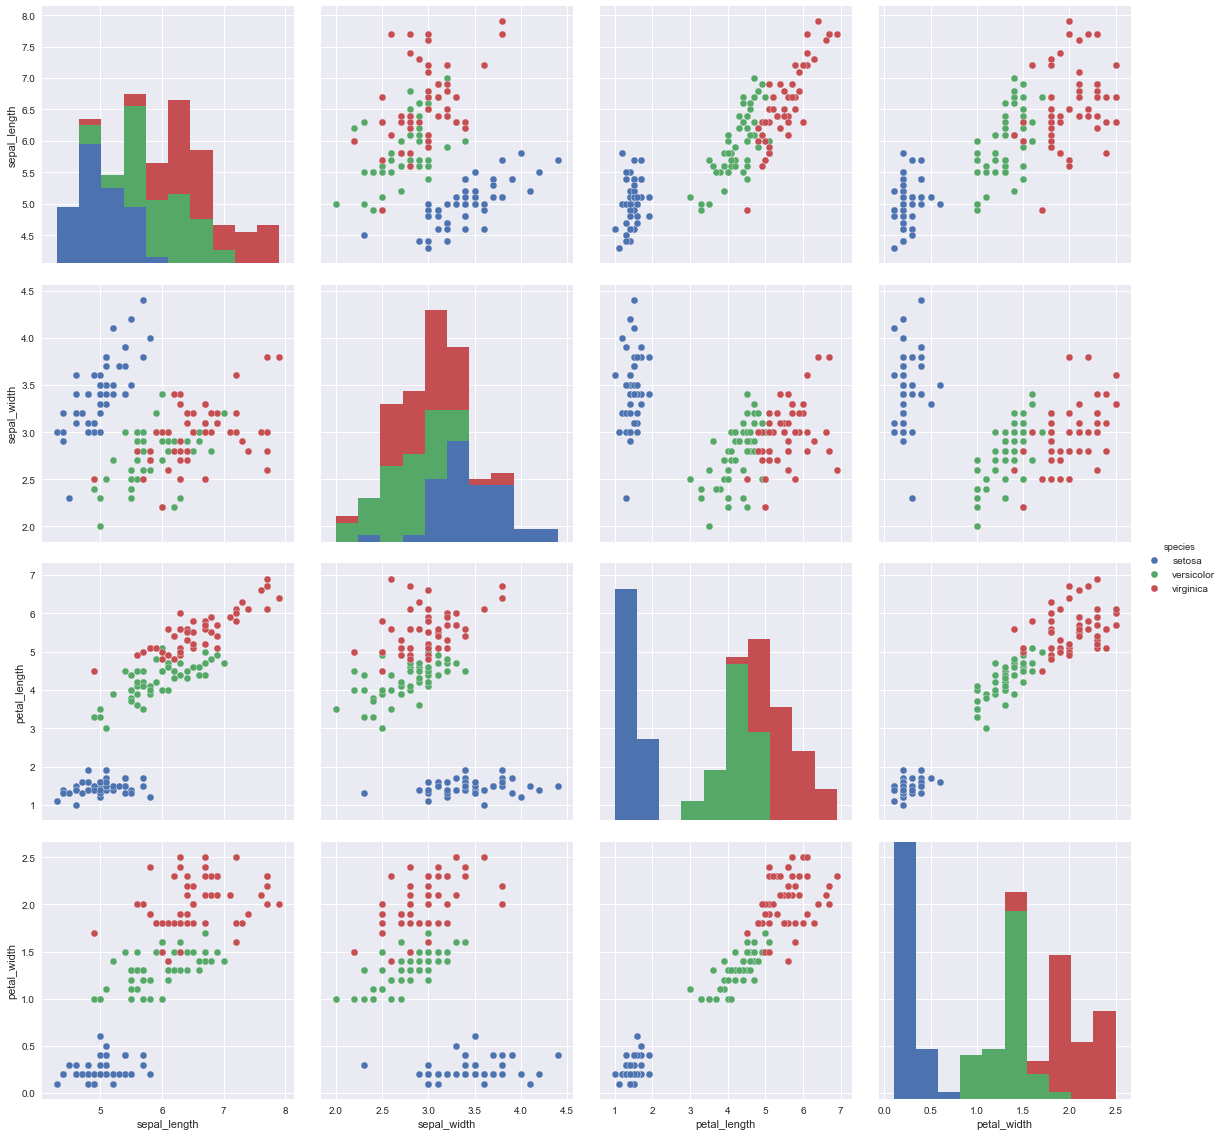

In [6]:
sns.set()
sns.pairplot(iris, hue = 'species', size = 4)

In [7]:
X_iris = iris.drop('species', axis = 1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


In [8]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
print(model)
model.fit(Xtrain, ytrain)
print(model.score(Xtrain, ytrain))

GaussianNB(priors=None)
0.9464285714285714


In [10]:
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_model))

0.9736842105263158


# Principal Component Analysis (PCA)

In [11]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
print(model)
model.fit(X_iris)
print(model.score(X_iris))
X_2D = model.transform(X_iris)
print(X_2D.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
-2.6997965106756645
(150, 2)


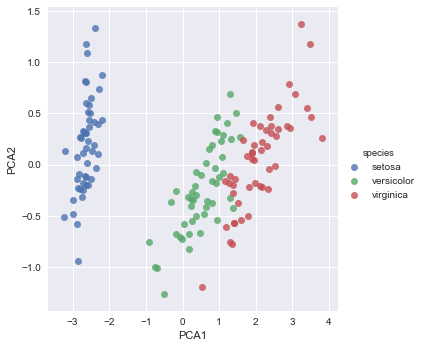

In [12]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False)

# Gaussian Mixture Model (GMM)

In [13]:
from sklearn.mixture import GMM
model = GMM(n_components = 3, covariance_type = 'full')
print(model)
model.fit(X_iris)
print(model.score(X_iris))

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)
[ 1.49448742e+00  6.75458210e-01  1.06800470e+00  8.58669951e-01
  1.33752512e+00 -1.25379832e-01  3.92302095e-02  1.55307606e+00
  1.93394988e-01  2.01505529e-01  7.86104548e-01  7.37457853e-01
  2.91777638e-01 -1.81192815e+00 -3.37014582e+00 -2.11834706e+00
 -1.03851814e+00  1.41238663e+00 -8.85574756e-01  9.11914345e-01
 -8.91245561e-01  4.31011571e-01 -3.74288530e+00 -1.72303887e+00
 -3.00818187e+00 -1.44718253e-01  5.19127912e-01  1.31506057e+00
  1.06430974e+00  6.48021566e-01  7.34193074e-01 -6.48656035e-01
 -2.00445104e+00 -9.14944118e-01  1.08603891e+00  8.80630991e-02
 -1.11091073e+00  2.46908780e-01  6.40723622e-02  1.43266153e+00
  9.11275900e-01 -4.39523305e+00 -3.88601502e-01 -3.98994226e+00
 -2.52250607e+00  6.41976094e-01  3.75804228e-01  9.63805019e-01
  1.10272328e+00  1.47023307e+00 -2.09674092e+00 -3.4819906

/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/DannyShau/anaconda/envs/py

/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


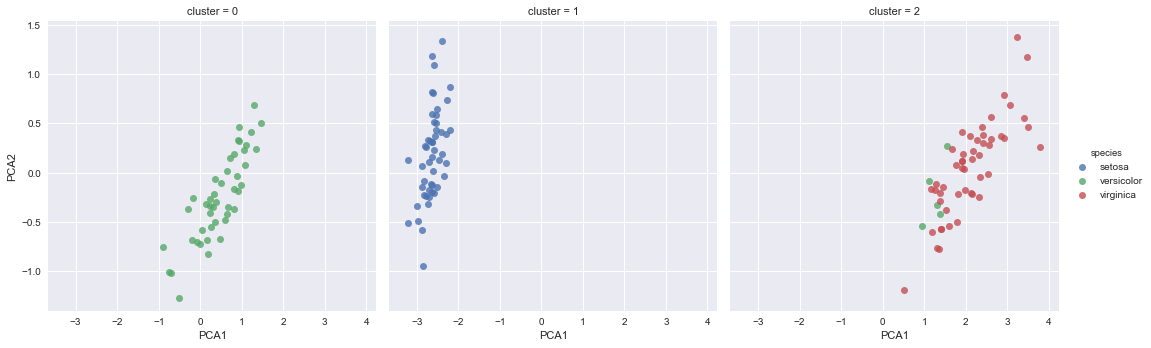

In [14]:
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', col = 'cluster', fit_reg = False)

# Manifold Learning (Isomap)

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


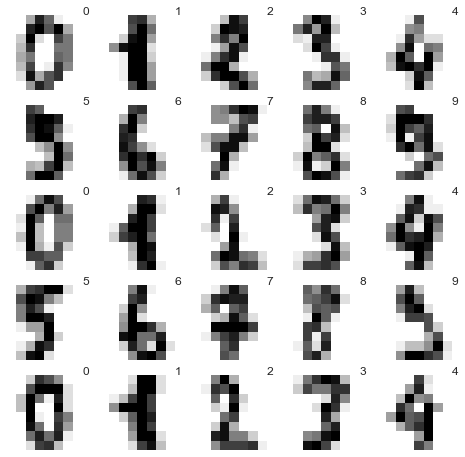

In [16]:
fig, axes = plt.subplots(5, 5, figsize = (8, 8), subplot_kw = {'xticks': [], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary')
    ax.text(1, 1, str(digits.target[i]), transform = ax.transAxes)

In [17]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
print(iso)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)
(1797, 2)


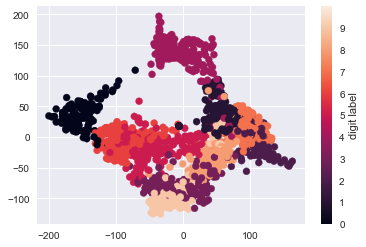

In [18]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target)
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(0, 10)

# Gaussian Naive Bayes

In [19]:
X = digits.data
print(X.shape)
y = digits.target
print(y.shape)

(1797, 64)
(1797,)


In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
print(model)
model.fit(Xtrain, ytrain)
print(model.score(Xtrain, ytrain))

GaussianNB(priors=None)
0.8574610244988864


In [22]:
from sklearn.metrics import accuracy_score
y_model = model.predict(Xtest)
print(accuracy_score(ytest, y_model))

0.8333333333333334


Text(84.4,0.5,'True')

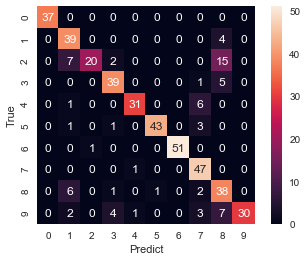

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square = True, annot = True)
plt.xlabel('Predict')
plt.ylabel('True')

# Model Validation

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

### Holdout Sets

In [26]:
from sklearn.cross_validation import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)
y1_model = model.fit(X2, y2).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
print(accuracy_score(y1, y1_model))
print(accuracy_score(y2, y2_model))

0.96
0.9066666666666666


### Cross-Validation

In [27]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(model, X, y, cv = 5))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


### Leave-One-Out Cross-Validation

In [28]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut(len(X)))
print(scores)
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.96


# Validation Curve

### Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [30]:
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - (1. / (X.ravel() + 0.1))
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

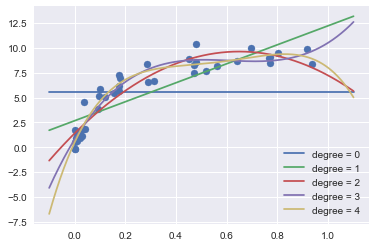

In [31]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y)
axis = plt.axis()
for degree in [x for x in range(5)]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree = %d' % (degree))
plt.legend()

### Overfit

/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


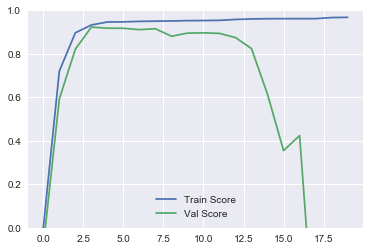

In [32]:
from sklearn.learning_curve import validation_curve
degree = np.arange(20)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), label = 'Train Score')
plt.plot(degree, np.median(val_score, 1), label = 'Val Score')
plt.ylim(0, 1)
plt.legend()

備註：二階函式生成之數據，三階方程可找到最佳解（模型）

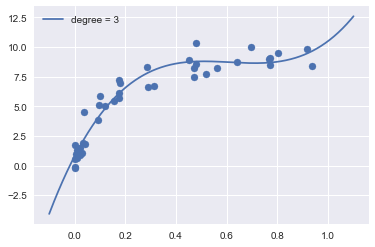

In [33]:
plt.scatter(X.ravel(), y)
axis = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, label = 'degree = %d' % (3))
plt.legend()

# Learning Curve

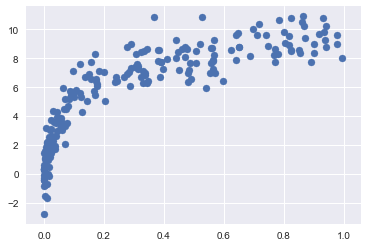

In [34]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

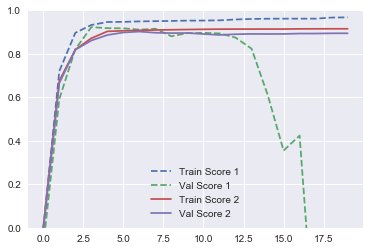

In [35]:
degree = np.arange(20)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), label = 'Train Score 1', linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1), label = 'Val Score 1', linestyle = 'dashed')
plt.plot(degree, np.median(train_score2, 1), label = 'Train Score 2')
plt.plot(degree, np.median(val_score2, 1), label = 'Val Score 2')
plt.ylim(0, 1)
plt.legend()

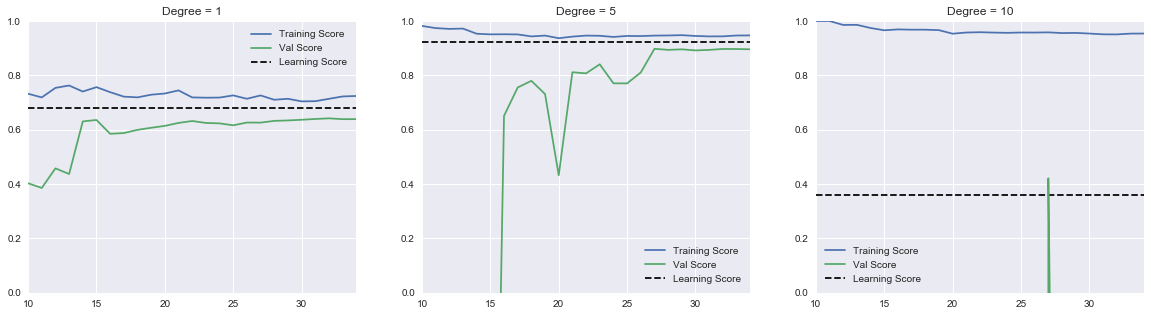

In [36]:
from sklearn.learning_curve import learning_curve
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
for i, degree in enumerate([1, 5, 10]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv = 7, train_sizes = np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), label = 'Training Score')
    ax[i].plot(N, np.mean(val_lc, 1), label = 'Val Score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], linestyle = 'dashed', label = 'Learning Score')
    ax[i].set_title('Degree = %d' % (degree))
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_ylim(0, 1)
    ax[i].legend()

# Grid Search

In [37]:
from sklearn.grid_search import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)
grid.fit(X, y)
print(grid.best_params_)

/Users/DannyShau/anaconda/envs/py3.5/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'polynomialfeatures__degree': 4, 'linearregression__normalize': True, 'linearregression__fit_intercept': False}


(-0.05837591284348665,
 0.9959064049396961,
 -0.7485237455039975,
 10.92057542617113)

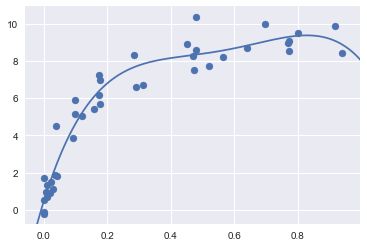

In [38]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)